In [1]:
# Install a pip package in the current Jupyter kernel - https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
import sys
!{sys.executable} -m pip install matplotlib numpy
sys.path.append('.')
import plotUtil
import scipy


[notice] A new release of pip is available: 23.0 -> 23.3
[notice] To update, run: python3.10 -m pip install --upgrade pip


QD scores for a single evolutionary run.

In [2]:
import numpy as np

#json_file_path = '/Users/bthj/QD/conf-duration_delta_pitch_combinations/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_thrshld_0.5_1685802618657.json'
# json_file_path = '/Users/bjornpjo/QD-Fox/conf-static_mutation_rate_combinations-singleCellWin/evolution-run-analysis_qd-scores_step-1000_1693594479400.json'
# json_file_path = '/Users/bjornpjo/QD-ROBIN/conf-static_mutation_rate_combinations/evolution-run-analysis_qd-scores,cell-scores_step-1000_1695837415460.json'
# json_file_path = '/Users/bjornpjo/QD-ROBIN/conf-static_mutation_rate_combinations/evolution-run-analysis_qd-scores,cell-scores_step-1000_1696000553178.json'
json_file_path = '/Users/bjornpjo/QD-Fox/analysis/rev1/evolution-run-analysis_qd-scores_step-10000_1698268645692.json'
x_multiplier = 1000  # Set this value as the step size in the JSON file name
title = "qdScores: " + json_file_path.split('/')[4]

# Read data from JSON file
data = plotUtil.read_data_from_json(json_file_path)

qd_score_arrays = plotUtil.extract_data_arrays(data, 'qdScores')

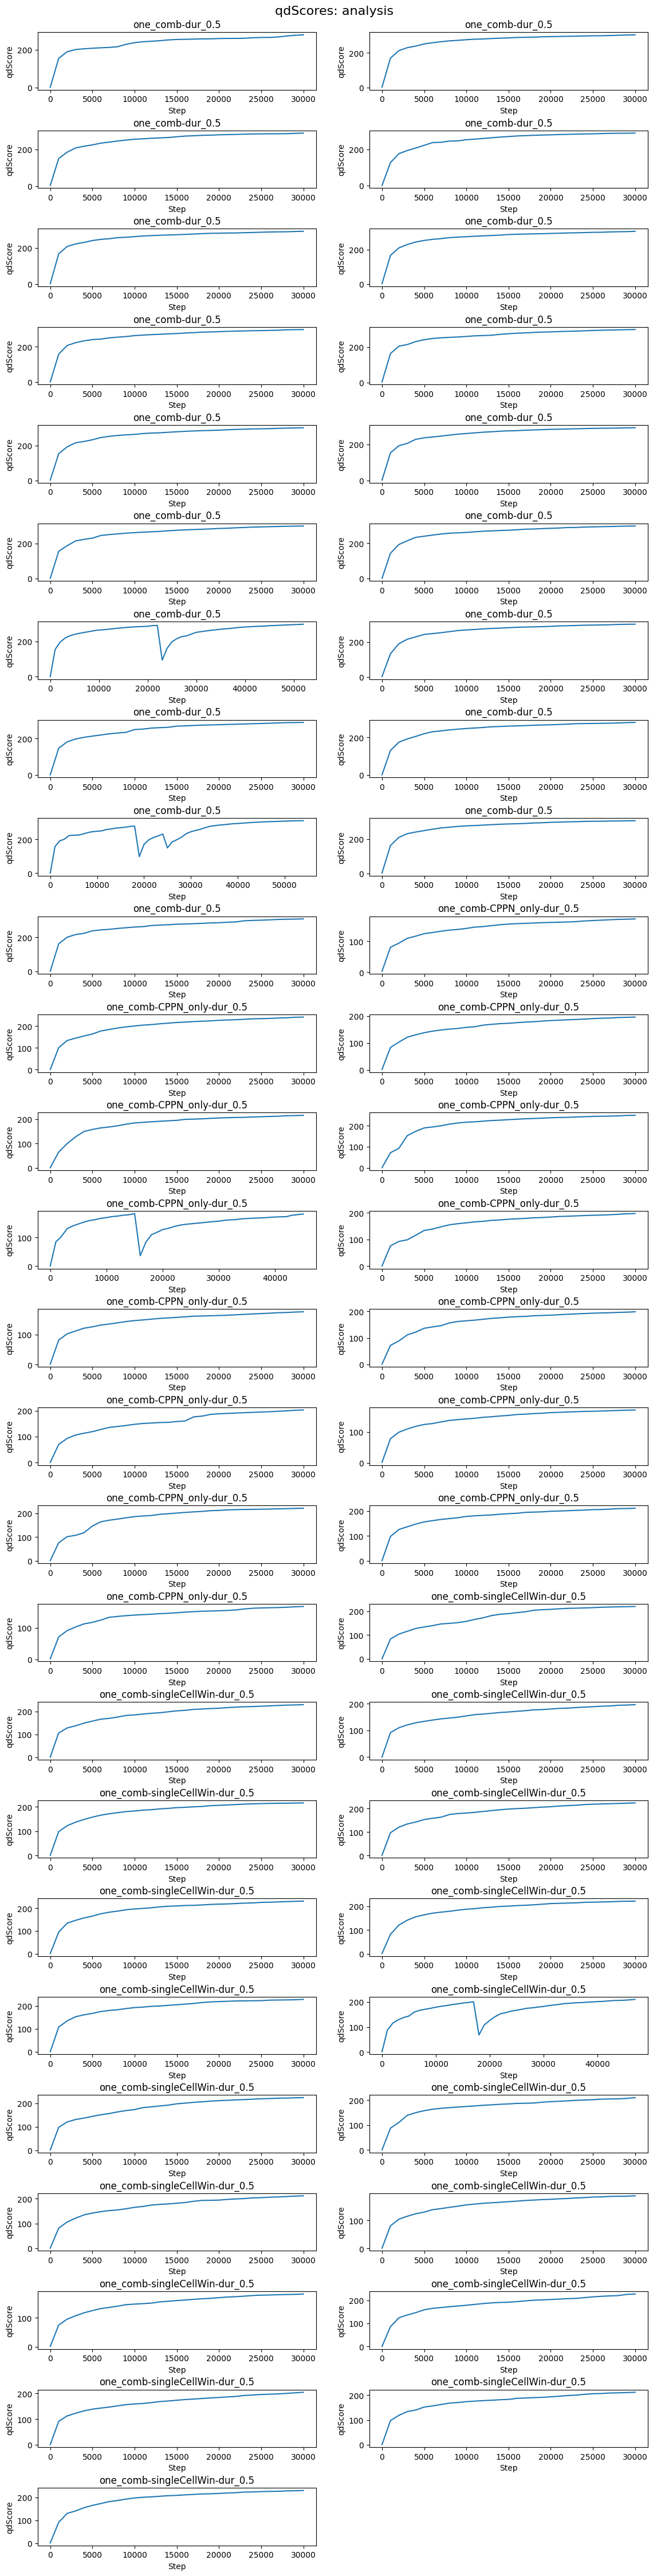

In [3]:

def qdScoresPlot(plotter, axesSubplot, x_values, qdScores, title):

    if len(title) > 50:
        title = title[:50] + '\n' + title[50:]
        plotter.subplots_adjust(hspace=0.4)
        # add space for the second line of the title
        plotter.subplots_adjust(top=0.98)

    axesSubplot.plot(x_values, qdScores)
    axesSubplot.set_title(title)
    axesSubplot.set_xlabel('Step')
    axesSubplot.set_ylabel('qdScore')

plotUtil.render_graphs(qd_score_arrays, x_multiplier, qdScoresPlot, 12, 45, title)

In [5]:
# Get the qdScores array from the JSON data at evoRuns[0].iterations[0].qdScores
qdScores = data['evoRuns'][0]['iterations'][0]['qdScores']

# Print the qdScores array
print(qdScores)

# Plot the qdScores array, where the x values are multiplied by x_multiplier
import matplotlib.pyplot as plt

x_values = np.arange(len(qdScores)) * x_multiplier
title = 'QD score'
qdScoresPlot(plt, x_values, qdScores, title)

[1, 0.555780814306156, 0.47038774947597556, 0.44808346260535087, 0.42438489057727763, 0.4179042551666498, 0.40705450917900043, 0.39715009903241144, 0.3990375165697895, 0.397429187279759, 0.39615360607762307, 0.3907974656564849, 0.3960091056207479, 0.3932041819360885, 0.39261340580718673, 0.3941609565087635, 0.3953458092668477, 0.3987647069887044, 0.400741799111991, 0.39801181302800853, 0.39766040463478136, 0.40225965138144637, 0.4034789288510578, 0.40613693966349557, 0.4080211303316721, 0.4092137350098175, 0.40988653442524015, 0.41074785108914214, 0.4193680034152099, 0.42190266591254005, 0.43021281336394834, 0.4364888527404482, 0.44508168049570584, 0.44908113553430196, 0.4542587686959467, 0.4561781815845858, 0.46020695218308405, 0.4601019825196374, 0.4600436592155749, 0.45963070581534077, 0.46048357444150106, 0.4592874259667626, 0.46344749263447266, 0.4640722492142864, 0.4654367662869491, 0.46725127362198643, 0.4705992134941089, 0.47257255459631675, 0.47222085076468184, 0.4729533651685

TypeError: qdScoresPlot() missing 1 required positional argument: 'title'

Plot aggregate QD

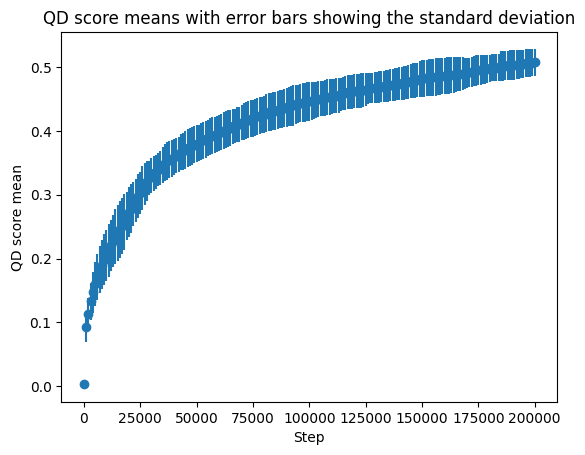

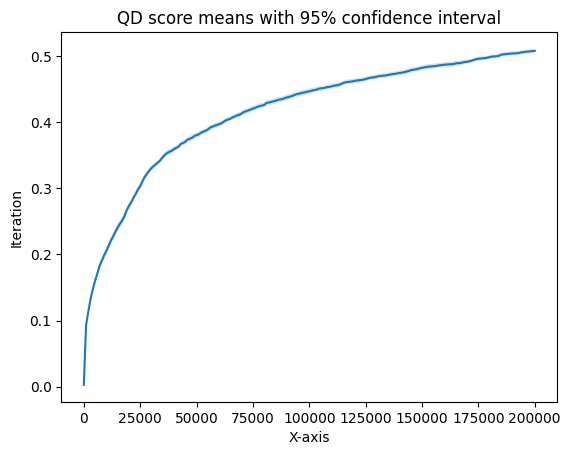

In [41]:
qdScoresMeans = data['evoRuns'][0]['aggregates']['qdScores']['means']
qdScoreVariances = data['evoRuns'][0]['aggregates']['qdScores']['variances']
qdScoreStdDevs = data['evoRuns'][0]['aggregates']['qdScores']['stdDevs']

x_values = np.arange(len(qdScoresMeans)) * x_multiplier

# Plot the qdScore means with error bars showing the standard deviation
plt.errorbar(x_values, qdScoresMeans, yerr=qdScoreStdDevs, fmt='o')
plt.title('QD score means with error bars showing the standard deviation')
plt.xlabel('Step')
plt.ylabel('QD score mean')
plt.show()


from scipy.stats import norm

# Plot the qdScore means with a confidence interval of 95%

# Define the confidence level and alpha
conf_level = 0.95
alpha = 1 - conf_level

# Calculate the half-width of the confidence interval
z_score = norm.ppf(1 - alpha/2)
half_width = z_score * np.array(qdScoreStdDevs, dtype=np.float64) / np.sqrt(len(qdScoresMeans))

# Calculate the upper and lower bounds of the confidence interval
upper_bound = qdScoresMeans + half_width
lower_bound = qdScoresMeans - half_width

# Plot the mean values as a line
plt.plot(x_values, qdScoresMeans) # plt.plot(x, y_means, '-o')

# Fill the area between the upper and lower bounds of the confidence interval
plt.fill_between(x_values, upper_bound, lower_bound, alpha=0.2)

# Add axes labels and a title
plt.xlabel('X-axis')
plt.ylabel('Iteration')
plt.title('QD score means with 95% confidence interval')

# Display the plot
plt.show()


